<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>


# Calculate the Bollinger Band for

> the month moving average of the Closing price for AAPL

## Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader as pdr

%matplotlib inline

## Load the data into a DataFrame


In [2]:
df = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls',
                   sheet_name='AAPL',
                   index_col='Date', 
                   parse_dates=True)

#df = pdr.get_data_yahoo('AAPL', '2000-01-01')

pd.concat([df.head(), df.tail()])

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.478462
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.185191
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.231803
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.952128
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.091966
2019-12-19,281.179993,278.950012,279.500000,280.019989,24592300,280.019989
2019-12-20,282.649994,278.559998,282.230011,279.440002,68994500,279.440002
2019-12-23,284.250000,280.369995,280.529999,284.000000,24643000,284.000000
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,284.269989


## Check what has been imported into the DataFrame
- Have a quick look at what we have read in
- No right or wrong way to do this
- Depends on your style, personal preferences, type of data being read in etc
- A few examples
> `df.tail()`
`df.head()`
`df.describe()`
    
**IMPORTANT**<br>
>When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner

<AxesSubplot:>

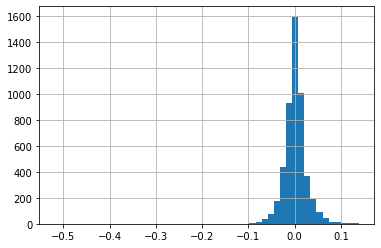

In [3]:
df['Close'].pct_change().hist(bins=50)

## Calculate the Bollinger Bands for the Adj. Close

- **Middle Band** = Monthly moving average <br>
- **Upper Band** = Monthly moving average + (Monthly standard deviation of price x 2) 
- **Lower Band** = Monthly moving average - (Monthly standard deviation of price x 2)

In [4]:
# 30 days is a good approximation of a single month
df['30d mavg'] = df['Close'].rolling(window=30).mean()
df['30d std'] = df['Close'].rolling(window=30).std()

df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

Insert a column indicating BUY, SELL, HOLD

In [5]:
#Add a new column all zeros
df['trigger'] = 0

# Set trigger column value to be 1 where close > upper band
df.loc[ df['Close'] > df['Upper Band'], 'trigger'] = 1

# Set trigger column value to be -1 where close < lower band
df.loc[ df['Close'] < df['Lower Band'], 'trigger'] = -1


## Plot the results

Use the matplot lib defaults

A plot of the entire series of values

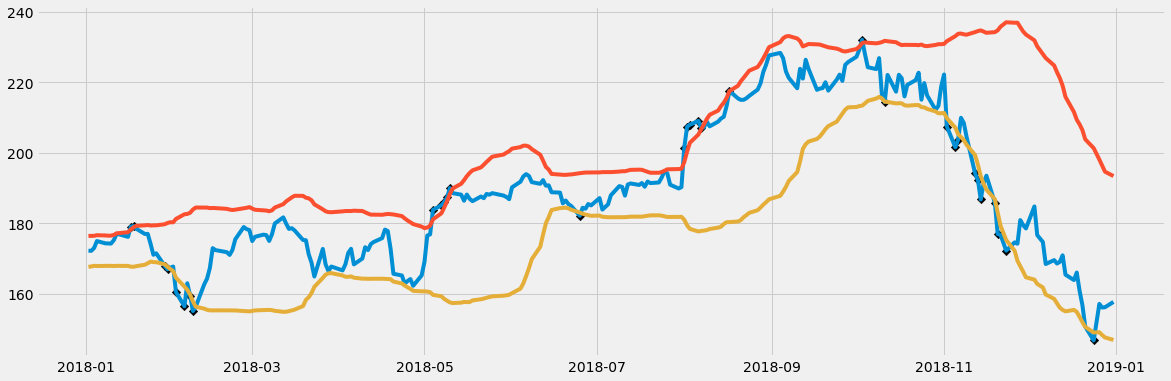

In [20]:
# plot close, upper band, lower band and all data points where trigger != 0 for 2018
df_2018 = df.loc['2018']

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))

plt.plot(df_2018[ ['Close', 'Upper Band', 'Lower Band'] ])
plt.scatter(df_2018[ df_2018['trigger'] > 0 ].index, df_2018[ df_2018['trigger'] > 0 ]['Close'], color='black', marker='D')
plt.scatter(df_2018[ df_2018['trigger'] < 0 ].index, df_2018[ df_2018['trigger'] < 0 ]['Close'], color='black', marker='D')

plt.show()

## Plot the results 

> of all data from the start of 2018 to the end of the series

Here use Slice from 2018 to the end

# Improve the presentation of the chart

Here I am 
- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

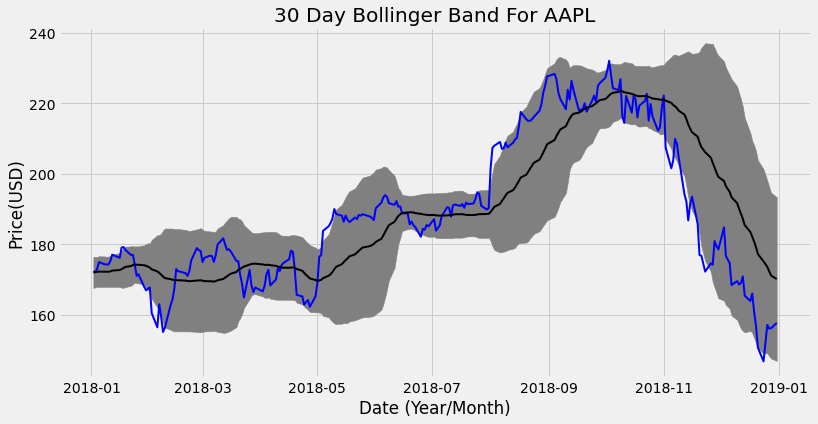

In [7]:
df_Boll = df.loc['2018']

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll.index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll['Upper Band'], 
                df_Boll['Lower Band'], 
                color='grey')

ax.plot(x_axis, df_Boll['Close'], color='blue', lw=2)
ax.plot(x_axis, df_Boll['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For AAPL')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();
